In [1]:
import numpy as np
import csv
import pandas as pd
import seaborn as sns

In [27]:
words1 = {
    'P': ['szig'],
    'S': ['rék'],
    'T': ['rud'],
    'V': ['zot'],
    'X': ['gán']
}

words2 = {
    'P': ['szig', 'mug', 'dup'],
    'S': ['rék', 'tof', 'mib'],
    'T': ['rud', 'rász', 'ket'],
    'V': ['zot', 'neb', 'dők'],
    'X': ['gán', 'dol', 'gal']
}

words3 = {
    'M': ['szir'],
    'R': ['gok'],
    'T': ['kav'],
    'V': ['diz'],
    'X': ['nef']
}

words4 = {
    'M': ['szir', 'rad', 'nub'],
    'R': ['gok', 'sot', 'péf'],
    'T': ['kav', 'bif', 'lam'],
    'V': ['diz', 'tez', 'lor'],
    'X': ['nef', 'vóp', 'dók']
}

words4cat = words4

cat4word = {}
for c, w in words4cat.items():
    for word in w:
        cat4word[word] = c

cats = list(words4cat.keys())
words = list(cat4word.keys())

In [3]:
def read_data(filename):
    data = []

    with open(filename) as csvfile:
        readCsv = csv.reader(csvfile, delimiter=',')
        for row in readCsv:
            while '0' in row:
                row.remove('0')
            while '' in row:
                row.remove('')
            data.append(row)

    return data

In [4]:
def get_pair_occurrences(data):
    res_dict = {}

    for row in data:
        for (i, j) in zip(row, row[1:]):
            if (i, j) in res_dict:
                res_dict[(i, j)] += 1
            else:
                res_dict[(i, j)] = 1

    return res_dict

In [5]:
def get_tp(matrix, word1, word2):
    return matrix[words.index(word1)][words.index(word2)]

In [32]:
to_read = ['grammar2_cat_training_v2.csv']

data_training = []

for filename in to_read:
    data_training.append(read_data(filename))

data_training = sum(data_training, [])

training_occ = get_pair_occurrences(data_training)

,szir,rad,nub,gok,sot,péf,kav,bif,lam,diz,tez,lor,nef,vóp,dók
szir,0.00,0.00,0.00,0.09,0.07,0.04,0.07,0.06,0.03,0.05,0.11,0.11,0.02,0.22,0.05
rad,0.00,0.00,0.00,0.09,0.04,0.09,0.00,0.06,0.06,0.10,0.13,0.04,0.07,0.09,0.05
nub,0.00,0.00,0.00,0.06,0.05,0.11,0.11,0.03,0.06,0.12,0.05,0.16,0.04,0.02,0.05
gok,0.04,0.07,0.15,0.09,0.12,0.06,0.07,0.06,0.06,0.12,0.05,0.11,0.04,0.04,0.03
sot,0.04,0.27,0.12,0.02,0.05,0.15,0.04,0.03,0.10,0.12,0.13,0.13,0.04,0.04,0.03
péf,0.12,0.10,0.09,0.08,0.04,0.02,0.11,0.19,0.03,0.02,0.08,0.09,0.04,0.04,0.03
kav,0.00,0.00,0.06,0.04,0.04,0.00,0.07,0.00,0.03,0.10,0.00,0.05,0.04,0.02,0.00
bif,0.00,0.00,0.03,0.04,0.05,0.02,0.04,0.03,0.03,0.05,0.03,0.05,0.04,0.02,0.05
lam,0.00,0.00,0.00,0.13,0.02,0.06,0.11,0.00,0.00,0.02,0.03,0.05,0.04,0.02,0.03
diz,0.42,0.23,0.15,0.08,0.09,0.04,0.00,0.03,0.03,0.05,0.05,0.02,0.11,0.18,0.21
tez,0.08,0.17,0.24,0.09,0.04,0.02,0.00,0.06,0.03,0.05,0.03,0.02,0.11,0.22,0.28
lor,0.29,0.17,0.15,0.02,0.05,0.09,0.04,0.00,0.10,0.00,0.11,0.04,0.38

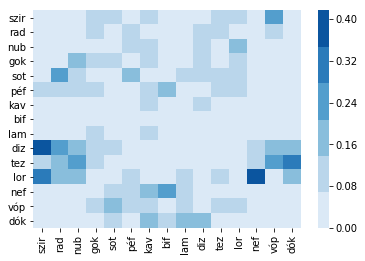

In [33]:
n = len(words)
M_words = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if (words[i], words[j]) in training_occ:
            M_words[i, j] = training_occ[(words[i], words[j])]

for j in range(n):
    s = sum(M_words[:, j])
    if s > 0:
        M_words[:, j] = [x/s for x in M_words[:, j]]

df = pd.DataFrame(M_words, index=words, columns=words)
sns.heatmap(df, cmap=sns.color_palette('Blues'))

file = open('output_training_tp.csv', 'w')
line = ',' + ','.join(words)
file.write(line + '\n')
print(line)
for i in range(len(M_words)):
    line = words[i] + ',' + ','.join('%.2f' % number for number in M_words[i])
    file.write(line + '\n')
    print(line)
file.close()

In [34]:
to_read = ['grammar2_cat_test_gr_v2.csv']

data_test = []

for filename in to_read:
    data_test.append(read_data(filename))

data_test = sum(data_test, [])

In [35]:
width = max(map(lambda x: len(x), data_test)) - 1
height = len(data_test)
M_words_comp = [[-1]*width for _ in range(height)]

for i in range(len(data_test)):
    row = data_test[i]
    for j in range(len(row) - 1):
        M_words_comp[i][j] = get_tp(M_words, row[j], row[j+1])

file = open('output_test_tp.csv', 'w')
for row in M_words_comp:
    numbers = list(filter(lambda x: x >= 0, row))
    line = ','.join('%.2f' % number for number in row).replace('-1.00', '') + ',' + '%.2f' % (sum(numbers) / len(numbers))
    file.write(line + '\n')
    print(line)
file.close()

0.05,0.06,0.04,0.22,0.07,0.00,0.03,0.07
0.07,0.04,0.07,0.06,0.12,0.04,,0.07
0.09,0.08,0.11,0.15,,,,0.11
0.22,0.11,0.02,0.11,0.13,,,0.12
0.17,0.04,0.12,0.12,0.04,,,0.10
0.29,0.09,0.04,0.02,0.13,0.03,,0.10
0.22,0.13,0.04,0.13,0.00,0.05,0.17,0.11
0.18,0.13,0.03,,,,,0.11
